# COMPAS and Recidivism

## Data Wrangle

The data set that we used can be found at: https://www.kaggle.com/danofer/compass/data#compas-scores-raw.csv<br>
R version: https://github.com/propublica/compas-analysis/blob/master/Compas%20Analysis.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading in the Data

In [2]:
# load the data set into a pandas data frame
raw_score_df = pd.read_csv("compas-scores-raw.csv")

# raw_score_df.head(5) # Show the first 5 rows of the dataframe

In [3]:
# columns that are irrelevant to our computations
columns_to_drop = ['AssessmentID', 'Case_ID', 'Agency_Text', 'LastName', 'FirstName', 'MiddleName', \
                   'ScaleSet', 'AssessmentReason', 'Language', 'RecSupervisionLevelText', \
                   'ScoreText', 'AssessmentType', 'IsCompleted', 'IsDeleted']

In [4]:
raw_score_clean_df = raw_score_df.drop(columns_to_drop, axis=1)
raw_score_clean_df.head(5)

,Person_ID,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,Scale_ID,DisplayText,RawScore,DecileScore
0,50844,Male,Caucasian,12/05/92,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,7,Risk of Violence,-2.08,4
1,50844,Male,Caucasian,12/05/92,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,8,Risk of Recidivism,-1.06,2
2,50844,Male,Caucasian,12/05/92,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,18,Risk of Failure to Appear,15.00,1
3,50848,Male,Caucasian,09/16/84,22,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,7,Risk of Violence,-2.84,2
4,50848,Male,Caucasian,09/16/84,22,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,8,Risk of Recidivism,-1.50,1


In [5]:
# printing out unique values of a column
raw_score_clean_df['Ethnic_Code_Text'].unique()

array(['Caucasian', 'African-American', 'Hispanic', 'Other', 'Asian',
       'African-Am', 'Native American', 'Oriental', 'Arabic'],
      dtype=object)

In [6]:
# replacing values with similar values
raw_score_clean_df["Ethnic_Code_Text"].replace({"African-Am": "African-American", "Oriental": "Asian"}, inplace=True)

### Separating Data

Every individual in the csv has 3 types of risk: risk of violence, risk of recidivism, and risk of failure to appear. In order not to double count, we separated the 3 risks out into 3 different data frames.

In [7]:
# each person had 3 different 'DisplayText', so we decided to split it up into 3 data frames for each type
violence_df = raw_score_clean_df[raw_score_clean_df['DisplayText'] == 'Risk of Violence']
recidivism_df = raw_score_clean_df[raw_score_clean_df['DisplayText'] == 'Risk of Recidivism']
appearance_df = raw_score_clean_df[raw_score_clean_df['DisplayText'] == 'Risk of Failure to Appear']

In [8]:
violence_df.head(5)

,Person_ID,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,Scale_ID,DisplayText,RawScore,DecileScore
0,50844,Male,Caucasian,12/05/92,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,7,Risk of Violence,-2.08,4
3,50848,Male,Caucasian,09/16/84,22,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,7,Risk of Violence,-2.84,2
6,50855,Male,African-American,08/25/94,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,7,Risk of Violence,-1.20,8
9,50850,Female,African-American,10/09/94,22,Pretrial,Jail Inmate,Significant Other,1/1/13 0:00,2,7,Risk of Violence,-1.29,7
12,50839,Female,African-American,06/29/85,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,7,Risk of Violence,-2.90,2


### Stacked Bar Plot for Ethnicity and Gender

In [9]:
# gets the ethnicity count and the gender count within each ethnicity group
ethnic_gender_series = violence_df.groupby(['Ethnic_Code_Text', 'Sex_Code_Text']).count()['Person_ID']
ethnic_gender_series

Ethnic_Code_Text  Sex_Code_Text
African-American  Female           1861
                  Male             7162
Arabic            Female              1
                  Male               24
Asian             Female             22
                  Male               99
Caucasian         Female           1811
                  Male             5450
Hispanic          Female            577
                  Male             2337
Native American   Female             20
                  Male               53
Other             Female            151
                  Male              713
Name: Person_ID, dtype: int64

In [10]:
# separating list out by male and female to create stacked bar plot
female_count_list = []
male_count_list = []
for i in range(ethnic_gender_series.size):
    idx = i
    if (idx) % 2 == 0:
        female_count_list.append(ethnic_gender_series[idx])
    else:
        male_count_list.append(ethnic_gender_series[idx])
        
print(male_count_list)
print(female_count_list)

[7162, 24, 99, 5450, 2337, 53, 713]
[1861, 1, 22, 1811, 577, 20, 151]


reference: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html

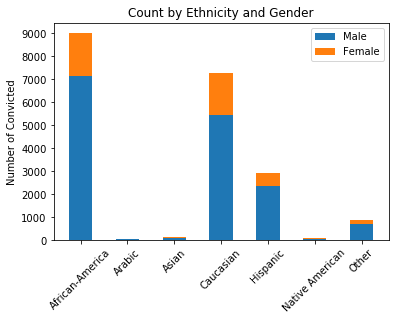

In [11]:
# create the stacked bar plot
width = 0.5
ind = np.arange(7) 

p1 = plt.bar(ind, male_count_list, width)
p2 = plt.bar(ind, female_count_list, width, bottom=male_count_list)

plt.title('Count by Ethnicity and Gender')
plt.ylabel('Number of Convicted')
plt.xticks(ind, ('African-American', 'Arabic', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other'), rotation=45)
plt.yticks(np.arange(0, 10000, 1000))
plt.legend((p1[0], p2[0]), ('Male', 'Female'))

plt.show()

### Ethnic Groups Decile Score Average

In [12]:
# grouping by ethnic group and decile score for risk of violence
ethnicities = ['African-American', 'Arabic', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']
violence_averages = []

for entry in ethnicities:
    temp = violence_df.loc[violence_df["Ethnic_Code_Text"] == entry]
    violence_averages.append(temp['DecileScore'].mean())

violence_averages

[4.183863460046548,
 2.88,
 2.0991735537190084,
 2.602809530367718,
 2.57035003431709,
 3.671232876712329,
 2.5949074074074074]

In [13]:
recidivism_df.head(5)

,Person_ID,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,Scale_ID,DisplayText,RawScore,DecileScore
1,50844,Male,Caucasian,12/05/92,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,8,Risk of Recidivism,-1.06,2
4,50848,Male,Caucasian,09/16/84,22,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,8,Risk of Recidivism,-1.50,1
7,50855,Male,African-American,08/25/94,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,8,Risk of Recidivism,0.18,8
10,50850,Female,African-American,10/09/94,22,Pretrial,Jail Inmate,Significant Other,1/1/13 0:00,2,8,Risk of Recidivism,-0.53,6
13,50839,Female,African-American,06/29/85,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,8,Risk of Recidivism,-1.55,2


In [14]:
appearance_df.head(5)

,Person_ID,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,Scale_ID,DisplayText,RawScore,DecileScore
2,50844,Male,Caucasian,12/05/92,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,18,Risk of Failure to Appear,15.0,1
5,50848,Male,Caucasian,09/16/84,22,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,18,Risk of Failure to Appear,19.0,3
8,50855,Male,African-American,08/25/94,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,18,Risk of Failure to Appear,13.0,1
11,50850,Female,African-American,10/09/94,22,Pretrial,Jail Inmate,Significant Other,1/1/13 0:00,2,18,Risk of Failure to Appear,11.0,1
14,50839,Female,African-American,06/29/85,22,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,18,Risk of Failure to Appear,16.0,2


In [15]:
# grouping by ethnic group and decile score for risk of recidivism
ethnicities = ['African-American', 'Arabic', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']
recidivism_averages = []

for entry in ethnicities:
    temp = recidivism_df.loc[recidivism_df["Ethnic_Code_Text"] == entry]
    recidivism_averages.append(temp['DecileScore'].mean())

recidivism_averages

[5.323063282721932,
 3.84,
 2.644628099173554,
 3.587660101914337,
 3.3126286890871652,
 5.287671232876712,
 2.8668981481481484]

In [16]:
# grouping by ethnic group and decile score for risk of failure to appear
ethnicities = ['African-American', 'Arabic', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']
appearance_averages = []

for entry in ethnicities:
    temp = appearance_df.loc[appearance_df["Ethnic_Code_Text"] == entry]
    appearance_averages.append(temp['DecileScore'].mean())

appearance_averages

[3.3683918873988694,
 2.68,
 2.4958677685950414,
 3.1342790249276957,
 2.671585449553878,
 3.191780821917808,
 2.068287037037037]

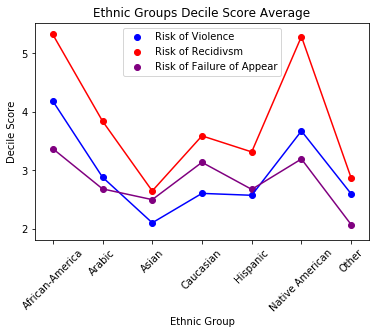

In [19]:
# create a line plot for averages
ind = np.arange(7) 

x_label = 'Ethnic Group'
y_label = 'Decile Score'
plt.title('Ethnic Groups Decile Score Average')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xticks(ind, ('African-American', 'Arabic', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other'), rotation=45)
plt.yticks(np.arange(0, 10, 1))

plt.scatter(ind, violence_averages, color='blue', label='Risk of Violence')
plt.plot(ind, violence_averages, color='blue')
plt.scatter(ind, recidivism_averages, color='red', label='Risk of Recidivsm')
plt.plot(ind, recidivism_averages, color='red')
plt.scatter(ind, appearance_averages, color='purple', label='Risk of Failure of Appear')
plt.plot(ind, appearance_averages, color='purple')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn import metrics
from matplotlib import style
import matplotlib.pyplot as plt
data = pd.read_csv("cox-violent-parsed_filter.csv")
#x= np.array(raw_score_df.drop([],1));
#x=preprocessing.scale(x)
#raw_score_df.dropna(inplace=True)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
#clf=LinearRegression()
#LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
#clf.fit(X_train,y_train)
#accuracy=clf.score(X_test,y_test)
#accuracy=accuracy*100
#accuracy = float("{0:.2f}".format(accuracy))
#print('Accuracy is:',accuracy,'%')
#